### Importing libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import math

### Importing the mnist_train dataset for the training

In [5]:
RawData = pd.read_csv('mnist_train.csv')

### let have a look at the dataset

In [6]:
RawData.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


The data has first columns as 'label' and have 60k entries and 784 column apart from label, and data type of each value in int64.

In [8]:
image = np.array(RawData.iloc[1,1:])

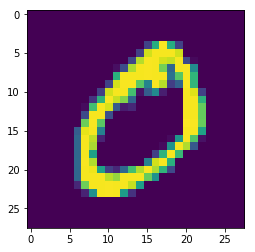

In [9]:
image = image.reshape(28,28)
plt.imshow(image)

In [10]:
v = RawData.iloc[:,0].unique()
print(v)

[5 0 4 1 9 2 3 6 7 8]


### Only for zeros

Let's Try to make logistic Regression Classifier for only zero.

Make a new Dataframe having 'label' column dropped or sliced out.

In [11]:
InterestedData = RawData.iloc[:,1:]

Since no value is smaller than zero so dropping all the columns having mean equals to zero will not have much effect on 
the learning of the model.<br>
Since the mean is 0 then all the values in that columns will also be zero.

In [14]:
for i in InterestedData.columns:
    if InterestedData[i].mean() == 0:
        InterestedData = InterestedData.drop(i,axis = 1)
print(InterestedData.shape)

(60000, 717)


Just for better understanding we have copied all the data in X variable.

In [21]:
X = InterestedData.iloc[:,:]

In [22]:
X.shape

(60000, 717)

Concatenating the bias term in front of the list.

In [23]:
X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)

y is an arry having all the values 0 apart from where the '0' was actually in the RawData['label']

In [24]:
y = ((RawData == 0).iloc[:,0]*1).values.reshape(-1,1)

Now, prevent from our exponent function from exploding or diminishing we will bring the value of X in between 0 and 1.<br>
Since X is the colour so it can have maximum value of 255.

In [25]:
X = X/255

In [26]:
X.shape

(60000, 718)

In [27]:
y.shape

(60000, 1)

Weights in i.e. theta0 are initialised a value between 0 to 1.

In [28]:
theta0 = np.random.randn(X.shape[1],1)
print(theta0.shape)

(718, 1)


Now, we will calculate the sigmoid function value i.e. 'h'.

In [29]:
z = np.dot(X,theta0)
print(z.shape)

(60000, 1)


In [30]:
h = 1/(1 + np.exp(-z))
print(h.shape)

(60000, 1)


Calculate the cost on the randomly initialised value of theta.

In [31]:
cost = -1*(np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))/X.shape[0]
print(cost)

[[inf]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


We will update the value of theta.

In [32]:
for i in range(100):
    
    z = np.dot(X,theta0)
    
    h = 1/(1 + np.exp(-z))
    
    theta0 = theta0 - 0.01*np.dot(X.T,h-y)/X.shape[0]

In [33]:
z = np.dot(X,theta0)
h = 1/(1 + np.exp(-z))

Now Again calculate the cost with the updated theta.

In [34]:
cost = -1*(np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))/X.shape[0]
print(cost)

[[1.35732301]]


#### Now we will try to fit the same model for all the numbers 

In [35]:
InterestedData = RawData.iloc[:,1:]

In [36]:
InterestedData.shape

(60000, 784)

In [53]:
X = InterestedData[:]

In [54]:
X = X/255

In [55]:
X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)
print(X.shape)

(60000, 785)


Initialization of the value of with zero. Because every time Initializing the value with random.randn a 'divide by zero' error by invoked.

In [62]:
ThetaAll = np.zeros((X.shape[1],10))
print(ThetaAll.shape)

(785, 10)


In [63]:
z = np.dot(X,ThetaAll)
print(z.shape)

(60000, 10)


In [64]:
h = 1/(1 + np.exp(-z))
print(h.shape)

(60000, 10)


Calculating the cost on the initialized values of theta.

In [65]:
J = []

In [66]:
for i in range(10):
    
    y = ((RawData.iloc[:,0] == i)*1).values.reshape(-1,1)
    
    cost = -1*(np.dot(y.T,np.log(h[:,i])) + np.dot((1-y).T, np.log(1-h[:,i])))/X.shape[0]
    
    J.append(cost)

In [67]:
J

[array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718]),
 array([0.69314718])]

In [64]:
print(ThetaAll[:,1].shape)

(785,)


Fitting the model on the values.

In [65]:
for i in range(10):
    
    y = ((RawData.iloc[:,0] == i)*1).values.reshape(-1,1)
    
    TempTheta = ThetaAll[:,i].reshape(-1,1)
    for j in range(500):
        
        z = np.dot(X,TempTheta)
        
        h = 1/(1 + np.exp(-z))
        
        gradient = (np.dot(X.T,h-y))/X.shape[0]
        
        TempTheta = TempTheta - 0.01*gradient
    print(i)
    
    ThetaAll[:,i] = TempTheta.reshape(785,) 

0
1
2
3
4
5
6
7
8
9


In [66]:
ThetaAll.shape

(785, 10)

In [67]:
z = np.dot(X,ThetaAll)
print(h.shape)

(60000, 1)


In [68]:
h = 1/(1 + np.exp(-z))
print(h.shape)

(60000, 10)


Calculating the Cost on the training set after the fitting of data on the model.

In [68]:
J = []

In [70]:
for i in range(10):
    
    y = ((RawData.iloc[:,0] == i)*1).values.reshape(-1,1)
    
    cost = -1*(np.dot(y.T,np.log(h[:,i])) + np.dot((1-y).T, np.log(1-h[:,i])))/X.shape[0]
    
    J.append(cost)

In [71]:
J

[array([0.10759063]),
 array([0.09812091]),
 array([0.17276792]),
 array([0.18018415]),
 array([0.15971335]),
 array([0.20578431]),
 array([0.13326694]),
 array([0.13131513]),
 array([0.25432366]),
 array([0.21528268])]

In [72]:
check = np.argmax(h,axis = 1)
print(check)

[3 0 4 ... 5 6 8]


In [73]:
np.unique(check)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

### Now Testing the model on the mnist_test dataset

In [74]:
TestData = pd.read_csv("mnist_test.csv")

In [75]:
TestData.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
X_test = TestData.iloc[:,1:]

In [77]:
X_test.shape

(10000, 784)

In [78]:
X_test = X_test/255

In [79]:
X_test = np.concatenate([np.ones((X_test.shape[0],1)), X_test], axis = 1)
print(X_test.shape)

(10000, 785)


In [80]:
ThetaAll.shape

(785, 10)

Calculate the sigmoid function value on the test dataset.

In [81]:
z = np.dot(X_test,ThetaAll)

In [82]:
h = 1/(1 + np.exp(-z))

### Predicting the value

From each row we will take the index of column with max value and predict the value for that data the same index value.

In [83]:
pred = np.argmax(h , axis = 1)

Making the y variable containing the label of the 'mnist_test' dataset.

In [84]:
y = TestData['label']

In [85]:
pred.shape

(10000,)

In [86]:
y.shape

(10000,)

Cal contain the value in 0 and 1.<br>
1 where the predicted value and y matched.<br>
0 where the predicted value and y doesn't matched.

In [89]:
cal = (pred == y)*1

The mean of the cal will be the accuracy of the model.

In [90]:
cal.mean()

0.8396